In [6]:
import pandas as pd 
import numpy as np
import os

In [8]:
train_data = pd.DataFrame({'file': os.listdir(r"C:\Users\Soundous\Desktop\PRODIGY_ML_03\train\train")})
train_data 

,file
0,cat.0.jpg
1,cat.1.jpg
2,cat.10.jpg
3,cat.100.jpg
4,cat.1000.jpg
...,...
24995,dog.9995.jpg
24996,dog.9996.jpg
24997,dog.9997.jpg
24998,dog.9998.jpg


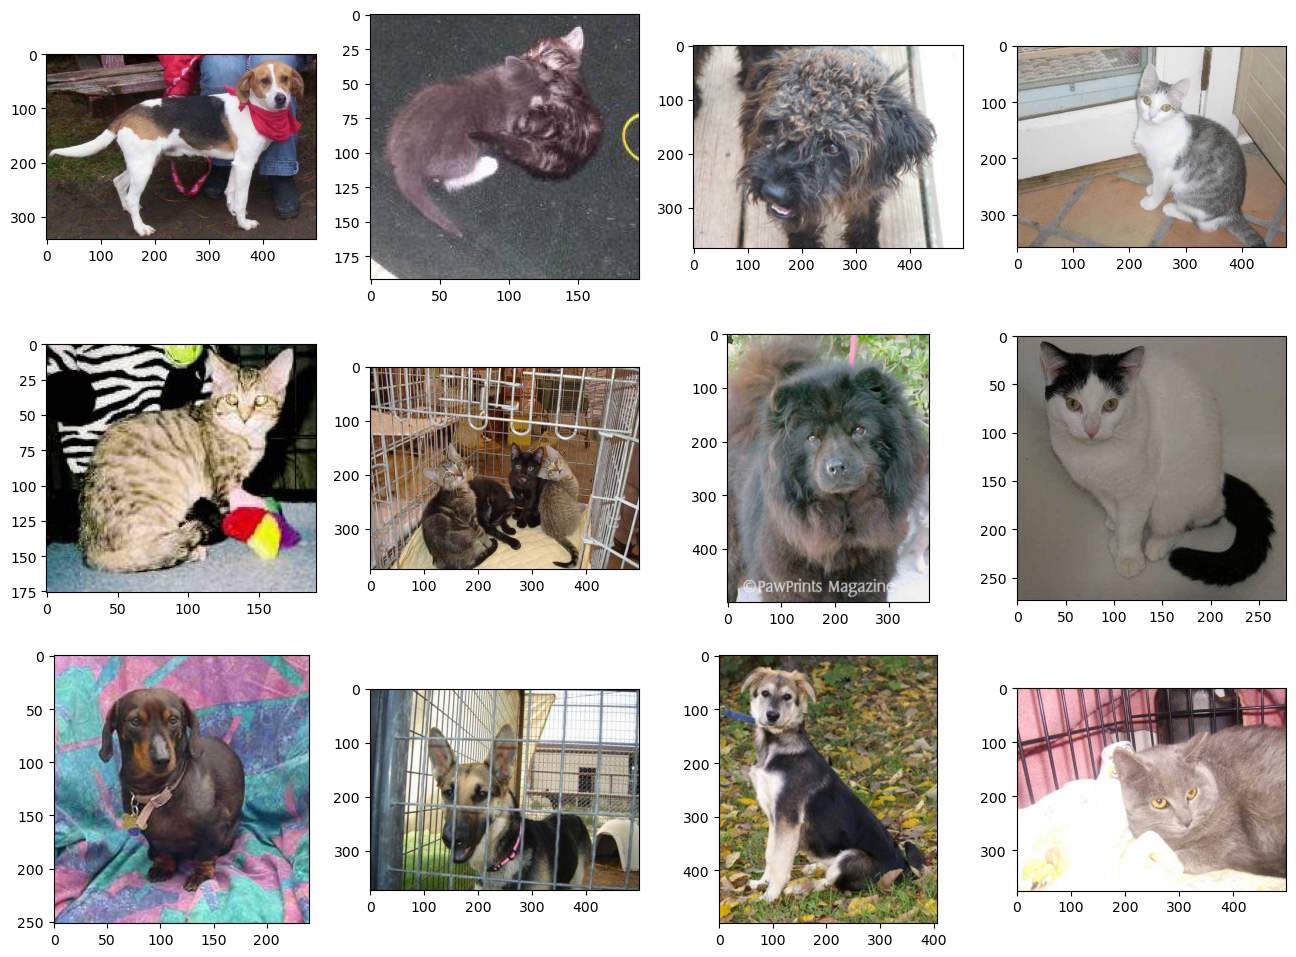

In [10]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import random

plt.figure(figsize=(16,16))

images = os.listdir(r"C:\Users\Soundous\Desktop\PRODIGY_ML_03\train\train")
for i in range(12):
    img = random.choice([x for x in images])
    fig = plt.subplot(4,4,i+1)
    img = mpimg.imread(os.path.join(r"C:\Users\Soundous\Desktop\PRODIGY_ML_03\train\train", img)) 
    fig.imshow(img) 

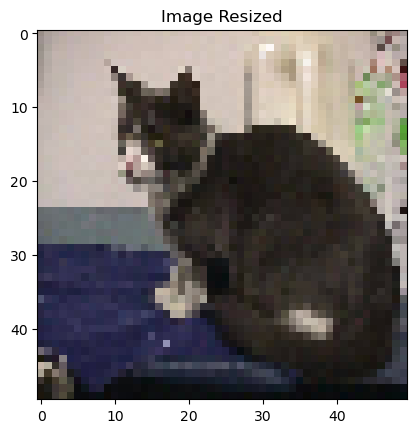

In [11]:
import cv2
import matplotlib.pyplot as plt

image_path = r"C:\Users\Soundous\Desktop\PRODIGY_ML_03\train\train\cat.4.jpg"

image = cv2.imread(image_path)
image_resized = cv2.resize(image, (50, 50))
plt.imshow(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB))
plt.title('Image Resized')
plt.show()

In [14]:
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV
import cv2

train_images = os.listdir(r"C:\Users\Soundous\Desktop\PRODIGY_ML_03\train\train")
features = []
labels = []
image_size = (50, 50)

for image in tqdm(train_images, desc="Processing Train Images"):
    if image[0:3] == 'cat' :
        label = 0
    else :
        label = 1
    image_read = cv2.imread(r"C:\Users\Soundous\Desktop\PRODIGY_ML_03\train\train"+"/"+image)
    image_resized = cv2.resize(image_read, image_size)
    image_normalized = image_resized / 255.0
    image_flatten = image_normalized.flatten()
    features.append(image_flatten)
    labels.append(label)
    
features = np.array(features)
labels = np.array(labels)

Processing Train Images: 100%|██████████████████████████████████████████████████| 25000/25000 [03:54<00:00, 106.80it/s]


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, shuffle=True, random_state=42)

In [18]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
n_components = 0.8
pca = PCA(n_components=n_components)
svm = SVC()
pca = PCA(n_components=n_components, random_state=42)
pipeline = Pipeline([
    ('pca', pca),
    ('svm', svm)
])
param_grid = {
    'pca__n_components': [2, 1, 0.9, 0.8],
    'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
}

In [20]:
grid_search = GridSearchCV(pipeline, param_grid, cv=3, verbose=4)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END pca__n_components=2, svm__kernel=linear;, score=0.528 total time=  17.9s
[CV 2/3] END pca__n_components=2, svm__kernel=linear;, score=0.525 total time=  19.1s
[CV 3/3] END pca__n_components=2, svm__kernel=linear;, score=0.537 total time=  19.1s
[CV 1/3] END pca__n_components=2, svm__kernel=rbf;, score=0.570 total time=  17.7s
[CV 2/3] END pca__n_components=2, svm__kernel=rbf;, score=0.560 total time=  16.7s
[CV 3/3] END pca__n_components=2, svm__kernel=rbf;, score=0.564 total time=  17.1s
[CV 1/3] END pca__n_components=2, svm__kernel=poly;, score=0.504 total time=  12.4s
[CV 2/3] END pca__n_components=2, svm__kernel=poly;, score=0.485 total time=  12.2s
[CV 3/3] END pca__n_components=2, svm__kernel=poly;, score=0.492 total time=  11.5s
[CV 1/3] END pca__n_components=2, svm__kernel=sigmoid;, score=0.507 total time=  10.2s
[CV 2/3] END pca__n_components=2, svm__kernel=sigmoid;, score=0.495 total time=  10.1s
[CV 3/

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=0.8, random_state=42)),
                                       ('svm', SVC())]),
             param_grid={'pca__n_components': [2, 1, 0.9, 0.8],
                         'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             verbose=4)

In [22]:
# Convert lists to numpy arrays
X = np.array(features)
y = np.array(labels)

In [24]:
# # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
best_pipeline = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: ", best_params)
print("Best Score: ", best_score)


Best Parameters:  {'pca__n_components': 0.9, 'svm__kernel': 'rbf'}
Best Score:  0.6738502183801701


In [28]:
accuracy = best_pipeline.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.6846


In [36]:
from sklearn.metrics import classification_report

y_pred = best_pipeline.predict(X_test)
target_names = ['Cat', 'Dog']
classification_rep = classification_report(y_test, y_pred, target_names=target_names)
print(classification_rep)



              precision    recall  f1-score   support

         Cat       0.69      0.69      0.69      2515
         Dog       0.68      0.68      0.68      2485

    accuracy                           0.68      5000
   macro avg       0.68      0.68      0.68      5000
weighted avg       0.68      0.68      0.68      5000



In [68]:

hog_params = {
    'orientations': 8,
    'pixels_per_cell': (8, 8),
    'cells_per_block': (2, 2),
    'block_norm': 'L2-Hys',
    'feature_vector': True
}


It's a cat!


C:\Users\Soundous\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


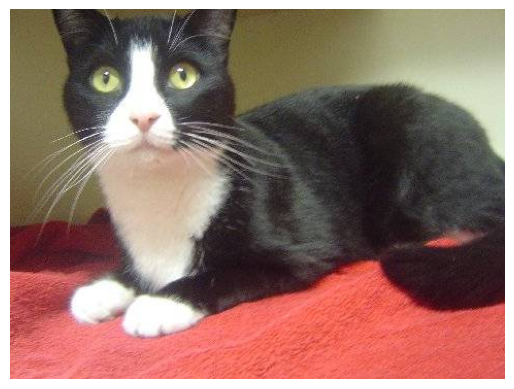

In [84]:
import os
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from tqdm import tqdm
import joblib
from sklearn.model_selection import GridSearchCV
import cv2
import seaborn as sns
import time
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from skimage.feature import hog
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skimage.io import imread
from skimage.transform import resize
import random
image_path = r"C:\Users\Soundous\Desktop\PRODIGY_ML_03\train\train\cat.800.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Failed to load the image. Check the image path.")
else:
    image = resize(image, (64, 64))  # Resize the image to a consistent size
    feature = hog(image, **hog_params)
    feature = np.array(feature).reshape(1, -1)  # Reshape the feature vector
    
    # Load the pre-trained SVM model
    svm_model = joblib.load(r"C:\Users\Soundous\Desktop\PRODIGY_ML_03\svm_model.pkl")
    
    # Make predictions
    prediction = svm_model.predict(feature)

    # Interpret the prediction
    if prediction == 0:
        print("It's a cat!")
    else:
        print("It's a dog!")

    # Visualize the image
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.axis('off')  # Turn off axis labels
    plt.show()


In [86]:
pip install scikit-learn==1.2.2


     ---------------------------------------- 0.0/7.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.3 MB 495.5 kB/s eta 0:00:15
      --------------------------------------- 0.1/7.3 MB 991.0 kB/s eta 0:00:08
     - -------------------------------------- 0.2/7.3 MB 1.5 MB/s eta 0:00:05
     -- ------------------------------------- 0.5/7.3 MB 2.8 MB/s eta 0:00:03
     ----- ---------------------------------- 1.0/7.3 MB 4.6 MB/s eta 0:00:02
     ---------- ----------------------------- 2.0/7.3 MB 7.5 MB/s eta 0:00:01
     ----------- ---------------------------- 2.1/7.3 MB 7.8 MB/s eta 0:00:01
     ----------- ---------------------------- 2.1/7.3 MB 7.8 MB/s eta 0:00:01
     ----------- ---------------------------- 2.1/7.3 MB 7.8 MB/s eta 0:00:01
     ----------- ---------------------------- 2.1/7.3 MB 7.8 MB/s eta 0:00:01
     ----------- ---------------------------- 2.1/7.3 MB 7.8 MB/s eta 0:00

  error: subprocess-exited-with-error
  
  Preparing metadata (pyproject.toml) did not run successfully.
  exit code: 1
  
  [33 lines of output]
  Partial import of sklearn during the build process.
  Traceback (most recent call last):
    File "C:\Users\Soundous\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
      main()
    File "C:\Users\Soundous\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
      json_out['return_val'] = hook(**hook_input['kwargs'])
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\Soundous\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 149, in prepare_metadata_for_build_wheel
      return hook(metadata_directory, config_settings)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\Soundous\AppData\Local\Temp\pip-build-env-yaej3glr\overlay\Lib\site-packages

It's a dog!


C:\Users\Soundous\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


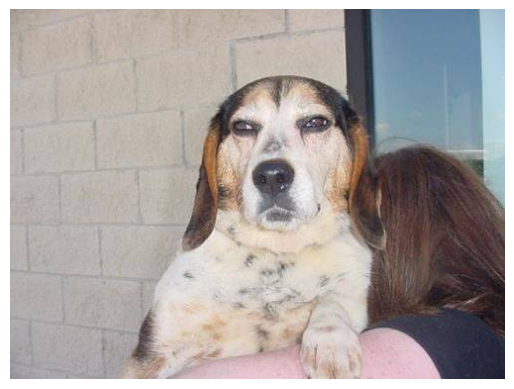

In [88]:
image_path = r"C:\Users\Soundous\Desktop\PRODIGY_ML_03\train\train\dog.800.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Failed to load the image. Check the image path.")
else:
    image = resize(image, (64, 64))  # Resize the image to a consistent size
    feature = hog(image, **hog_params)
    feature = np.array(feature).reshape(1, -1)  # Reshape the feature vector
    
    # Load the pre-trained SVM model
    svm_model = joblib.load(r"C:\Users\Soundous\Desktop\PRODIGY_ML_03\svm_model.pkl")
    
    # Make predictions
    prediction = svm_model.predict(feature)

    # Interpret the prediction
    if prediction == 0:
        print("It's a cat!")
    else:
        print("It's a dog!")

    # Visualize the image
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.axis('off')  # Turn off axis labels
    plt.show()


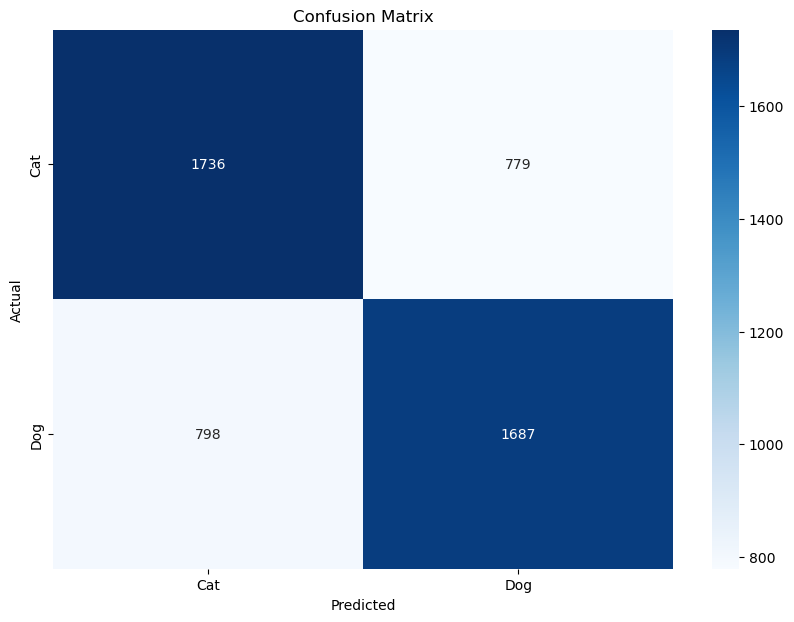

In [85]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()